# American Sign Language Detection

## 1 Introduction and Setup

### 1.1 Module Imports

In [17]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Imports
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer

# Keras and Tensorflow imports
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

### 1.2 Data Import

In [6]:
train = pd.read_csv('data/sign_mnist_train.csv')
test = pd.read_csv('data/sign_mnist_test.csv')

In [7]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:
train.shape, test.shape

((27455, 785), (7172, 785))

### 1.3 Data Distribution Visualization

<Axes: ylabel='count'>

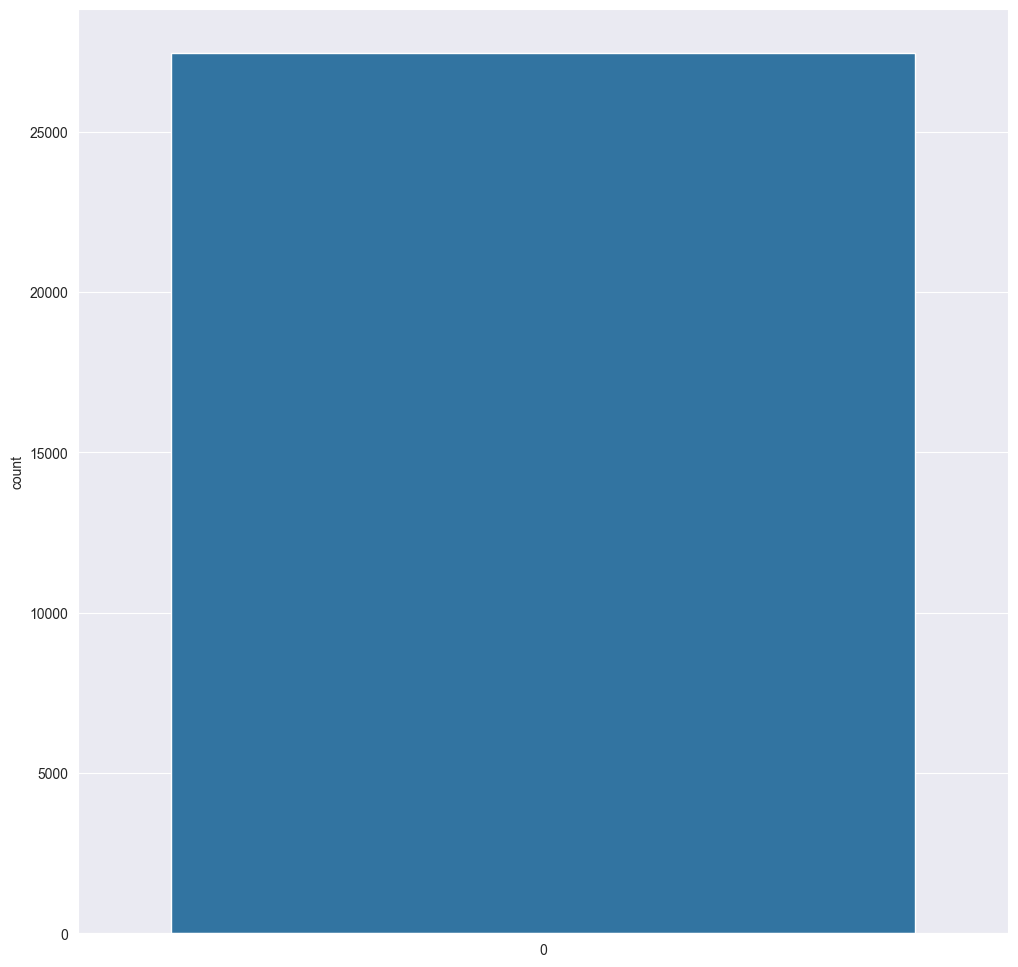

In [9]:
plt.figure(figsize=(12,12))
sns.set_style('darkgrid')
sns.countplot(train['label'])

### 1.4 Data Preprocessing

In [11]:
y_train = train['label']
y_test = test['label']

X_train = train.drop('label', axis=1)
X_test = test.drop('label', axis=1)

In [12]:
# Normalization of input data to 0-1 scale
X_train /= 255
X_test /= 255

In [18]:
#Binarization of the Data

labeller = LabelBinarizer()
y_train = labeller.fit_transform(y_train)
y_test = labeller.fit_transform(y_test)

In [21]:
# reshape the data (downsampling)

X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

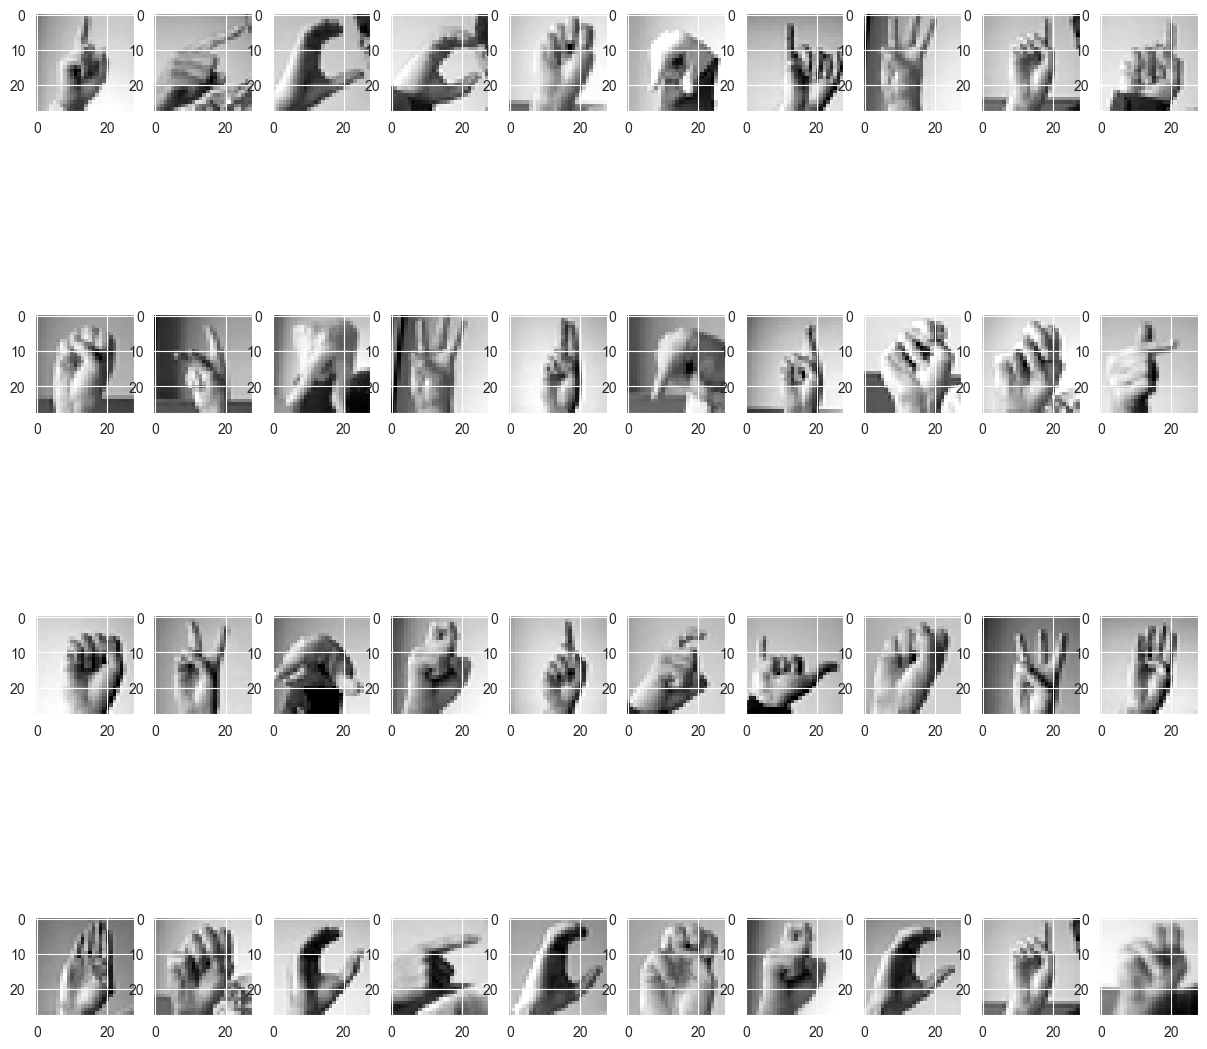

In [22]:
# Displayig some example images
plt.figure(figsize=(15,15))

x = 10
y = 4
for i in range(40):
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')

plt.show()